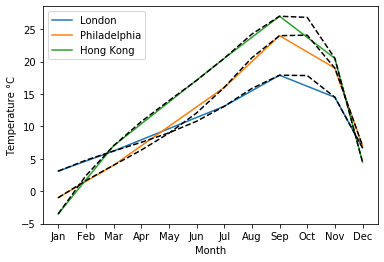

In [10]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

data = np.loadtxt('../ILAS_PyEng2019_updated/sample_data/temperature_data.csv', 
                  delimiter=",", 
                  skiprows=1, 
                  usecols=(tuple(range(1,7))))
months = [1, 3, 7, 9, 11, 12]

plt.plot(months, data[0], label="London");
plt.plot(months, data[1], label="Philadelphia");
plt.plot(months, data[2], label="Hong Kong");

plt.xlabel('Month')
plt.ylabel('Temperature °C')
plt.xticks(range(1,13), range(1,13))
plt.legend()

all_months = np.arange(1, 13, 1)

for i in range(3):
    interp = interp1d(months, data[i], 'cubic')
    plt.plot(all_months, interp(all_months), 'k--');

plt.xticks(range(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'));

[ 5.5  4.5  5.7  7.3 11.7 14.8 17.5 20.  19.  17.2 13.   8.8]
[ 0  2  4  6  8 10 12 14 16 18 20 22]
RMSE= 0.44159280876640616


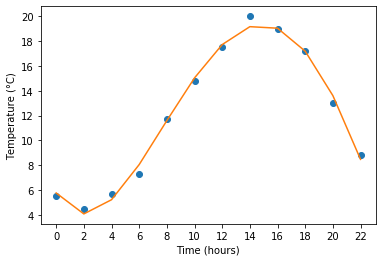

In [25]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

data = np.loadtxt('../ILAS_PyEng2019_updated/sample_data/air_temperature.dat',delimiter = ",")
print(data)

x = np.array([i for i in range(0,24,2)])
print(x)

plt.plot(x,data,'o')
plt.xlabel('Time (hours)')
plt.xticks(range(0,24,2), range(0,24,2))
plt.ylabel('Temperature (°C)')

f = np.polyfit(x,data, 4)
fit = np.poly1d(f)(x)
plt.plot(x,fit)

e = (fit - data)
rmse = np.sqrt(np.sum(e**2)/ len(data))
print("RMSE=",rmse)

[ 5.5  4.5  5.7  7.3 11.7 14.8 17.5 20.  19.  17.2 13.   8.8]


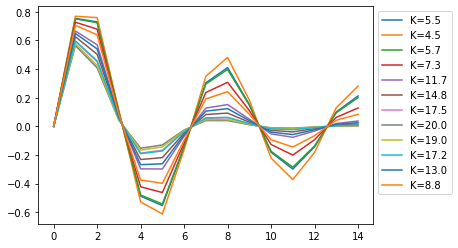

In [31]:
data = np.loadtxt('../ILAS_PyEng2019_updated/sample_data/air_temperature.dat', delimiter=",")
print(data)
x = range(15)

def test(x, K):
    return np.exp(-K * x /50) * np.sin(x)

for d in data:
    plt.plot(x, test(x, d), label=f'K={d}')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 7.07106781e-01  6.12323400e-17 -7.07106781e-01 -1.00000000e+00]
 [ 6.12323400e-17 -1.00000000e+00 -1.83697020e-16  1.00000000e+00]
 [-7.07106781e-01 -1.83697020e-16  7.07106781e-01 -1.00000000e+00]]
[ 3.  1. -3.  1.]
a,b,c,d:  [ 1.  2.  1. -1.]


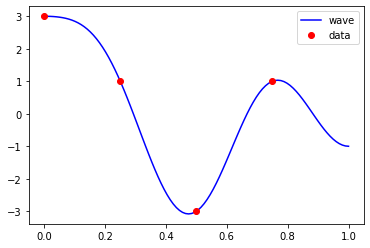

In [37]:
t = np.array([0, 0.25, 0.5, 0.75])
g = np.array([ 3, 1, -3, 1])

lhs = np.zeros((4, 4))
rhs = np.zeros(4)

for i in range(4):
    lhs[i] = np.cos(1 * np.pi * t[i]), \
             np.cos(2 * np.pi * t[i]), \
             np.cos(3 * np.pi * t[i]), \
             np.cos(4 * np.pi * t[i]) 
    rhs[i] = g[i]

print(lhs)
print(rhs)    
sol = np.linalg.solve(lhs, rhs)

print('a,b,c,d: ',sol)

t_all = np.linspace(0, 1, 100)  

g_all = sol[0] * np.cos(1 * np.pi * t_all) + \
        sol[1] * np.cos(2 * np.pi * t_all) + \
        sol[2] * np.cos(3 * np.pi * t_all) + \
        sol[3] * np.cos(4 * np.pi * t_all)

plt.plot(t_all, g_all, 'b', label='wave')

plt.plot(t, g, 'ro', label='data')
plt.legend(loc='best');

In [41]:
from scipy.integrate import quad
import sympy as sp
from sympy import symbols, integrate

x = symbols('x')
f = sp.exp(-x)

print(integrate(f, (x, 1, 5)))

def integrand(x):
    return np.exp(-x) / x

ans, err = quad(integrand, 1, 5)

print(ans)

-exp(-5) + exp(-1)
0.21823563880424607


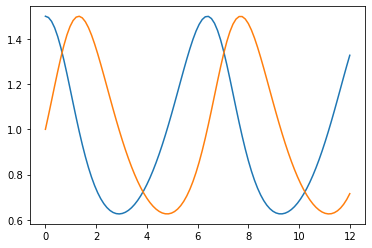

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [ P[0]*(a - b*P[1]), 
            -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]             

Ps = odeint(dP_dt, P0, ts)

prey = Ps[:,0]      
predators = Ps[:,1]

plt.plot(ts, prey)
plt.plot(ts, predators)